In [1]:
from keras.models import load_model
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

2024-05-14 23:53:30.025800: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-14 23:53:30.132207: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 23:53:30.904065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
X_val = np.load('X_val.npy')
Y_val = np.load('Y_val.npy')
X_val = X_val[..., np.newaxis]

In [3]:
model = load_model('my_model.keras')

2024-05-14 23:53:32.862953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:53:33.070375: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:53:33.070756: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:53:33.074844: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-14 23:53:33.075052: I external/local_xla/xla/stream_executor

In [4]:
test_error, test_accuracy = model.evaluate(X_val, Y_val, verbose=1)
print(f"Test accuracy: {test_accuracy}")

I0000 00:00:1715723624.660500   24400 service.cc:145] XLA service 0x7f93c8004b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715723624.661516   24400 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-05-14 23:53:44.679108: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-14 23:53:44.861509: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8901


13/32 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3103 - loss: 7.3395

I0000 00:00:1715723629.408229   24400 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.3090 - loss: 7.3347
Test accuracy: 0.2980000078678131


In [5]:
y = model.predict(X_val)
Y_pred = np.argmax(y,axis=1)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


In [6]:
cm = confusion_matrix(Y_val, Y_pred)


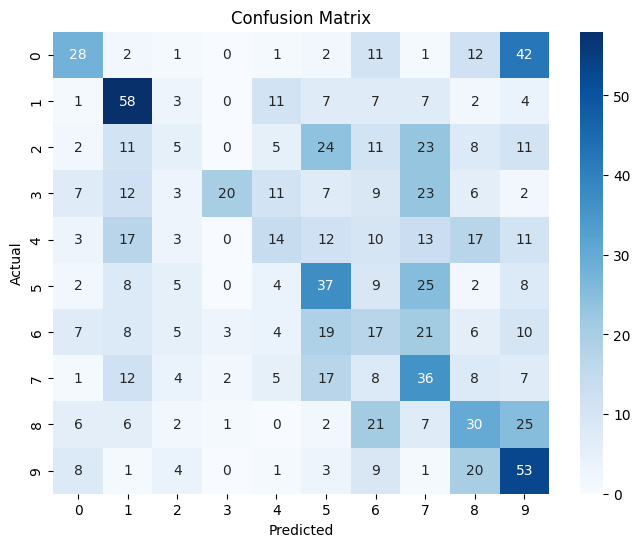

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()